# 📖 Метод нормального уравнения в линейной регрессии

## 🔹 Формула метода нормального уравнения

$$ \theta = (X^T X)^{-1} X^T y $$

где:
- \(X\) — матрица признаков (с добавленной колонкой 1 для смещения),
- \(y\) — вектор целевых значений (цена авто),
- \(\theta\) — веса модели (включая смещение).

🔹 **Цель:** Построить модель линейной регрессии и оценить ее качество с помощью метрик **MSE** и \( R^2 \).

   Возраст авто (лет)  Пробег (тыс. км)  Цена (тыс. руб.)
0                   7               140        100.000000
1                   4                60       1613.442888
2                  13               144        100.000000
3                  11                30        588.774846
4                   8                82        669.433233


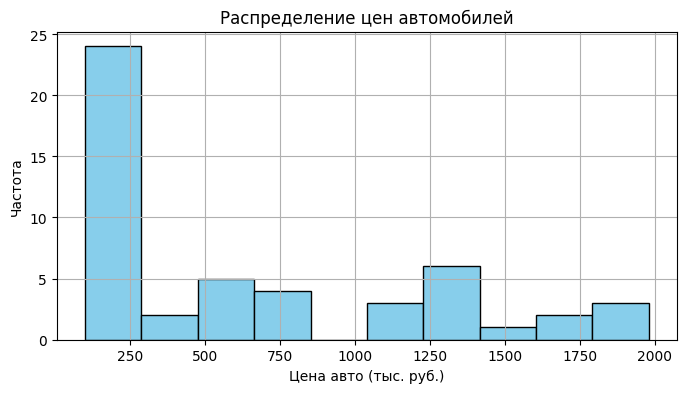

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🎯 Фиксируем случайность
np.random.seed(42)

# 📊 Генерируем возраст (1-15 лет) и пробег (10-200 тыс. км)
age = np.random.randint(1, 15, 50)
mileage = np.random.randint(10, 200, 50)

# 📌 Генерируем цену: базовая 3 млн, -200 тыс. за год, -10 тыс. за 1000 км пробега + шум
price = 3000 - (age * 200) - (mileage * 10) + np.random.normal(0, 100, 50)

# 📌 Заменяем отрицательные цены на 100 тыс. руб. (чтобы не было абсурда)
price = np.maximum(price, 100)

# 📊 Создаем DataFrame
df = pd.DataFrame({'Возраст авто (лет)': age, 'Пробег (тыс. км)': mileage, 'Цена (тыс. руб.)': price})

# 🖥️ Вывод первых строк
print(df.head())

# 📊 Гистограмма цен
plt.figure(figsize=(8, 4))
plt.hist(df['Цена (тыс. руб.)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Цена авто (тыс. руб.)")
plt.ylabel("Частота")
plt.title("Распределение цен автомобилей")
plt.grid()
plt.show()


## 🔹 Подготовка данных
Перед тем как использовать метод нормального уравнения, добавляем единичный столбец в матрицу признаков.

In [11]:
# 📌 Формируем матрицу признаков X (добавляем столбец 1 для смещения)
X = np.c_[np.ones(len(df)), df[['Возраст авто (лет)', 'Пробег (тыс. км)']]]

# 📌 Целевая переменная (вектор y)
y = df['Цена (тыс. руб.)'].values.reshape(-1, 1)

# 🖥️ Вывод первых 5 строк
print("Матрица признаков (X):\n", X[:5])
print("\nЦелевая переменная (y):\n", y[:5])

Матрица признаков (X):
 [[  1.   7. 140.]
 [  1.   4.  60.]
 [  1.  13. 144.]
 [  1.  11.  30.]
 [  1.   8.  82.]]

Целевая переменная (y):
 [[ 100.        ]
 [1613.44288826]
 [ 100.        ]
 [ 588.77484596]
 [ 669.43323301]]


## 🔹 Метод нормального уравнения
Рассчитаем веса \( \theta \) с помощью формулы:
$$ \theta = (X^T X)^{-1} X^T y $$

In [12]:
# 📌 Вычисляем веса модели с помощью нормального уравнения
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# 🖥️ Вывод коэффициентов
print(f"Смещение (intercept): {theta[0][0]:.2f}")
print(f"Возраст авто (лет): {theta[1][0]:.2f}")
print(f"Пробег (тыс. км): {theta[2][0]:.2f}")

Смещение (intercept): 2145.79
Возраст авто (лет): -118.40
Пробег (тыс. км): -5.44


## 🔹 Оценка качества модели
Метрики:
- **Среднеквадратичная ошибка (MSE)**:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
- **Коэффициент детерминации \( R^2 \)**:
$$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $$

In [13]:
# 📌 Делаем предсказания
y_pred = X @ theta

# 📌 Вычисляем метрики
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"📉 MSE (Ошибка): {mse:.2f}")
print(f"📈 R² (Качество модели): {r2:.4f}")

📉 MSE (Ошибка): 82808.22
📈 R² (Качество модели): 0.7753


## 🔹 Визуализация результатов
Графики:
1. **Фактические vs. предсказанные цены**
2. **Остатки предсказаний**

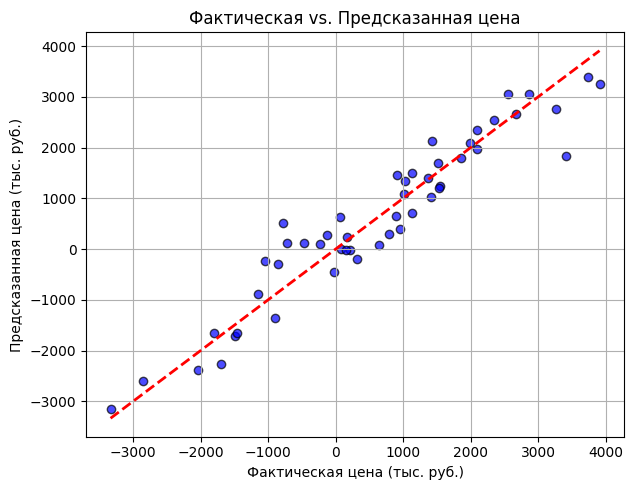

In [5]:
plt.figure(figsize=(12, 5))

# 📊 1. График реальных и предсказанных цен
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2)
plt.xlabel("Фактическая цена (тыс. руб.)")
plt.ylabel("Предсказанная цена (тыс. руб.)")
plt.title("Фактическая vs. Предсказанная цена")
plt.grid()

plt.tight_layout()
plt.show()